# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#API Keys
from api_keys import weather_api_key

#Import cities
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#List of latitudes and longitudes
lat_lngs = []

#List of cities
cities = []

#Range of lats and lngs
lat_range = (-90,90)
lng_range = (-180,180)

#Randomly generate latitudes and longitudes
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

#Find the nearest city for each coordinate pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #Add unique cities to cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

#City data list
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #Create endpoint URL with each city
    city_url = url + city
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | anloga
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | lida
Processing Record 5 of Set 1 | camacha
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | dodoma
Processing Record 17 of Set 1 | labutta
City not found. Skipping...
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | santa isabel do rio negro
Processing Record 22 of S

Processing Record 35 of Set 4 | evans
Processing Record 36 of Set 4 | mar del plata
Processing Record 37 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 4 | hilo
Processing Record 39 of Set 4 | baturaja
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | lindi
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | matameye
City not found. Skipping...
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | nanyamba
Processing Record 48 of Set 4 | trindade
Processing Record 49 of Set 4 | lata
Processing Record 0 of Set 5 | flin flon
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | wulanhaote
City not found. Skipping...
Processing Record 3 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 5 | saint marys
Processing Record 5 of Set 5 | tula
Processing Record 6 of Set 5 | d

Processing Record 21 of Set 8 | ponta delgada
Processing Record 22 of Set 8 | parras
City not found. Skipping...
Processing Record 23 of Set 8 | biltine
Processing Record 24 of Set 8 | zhaotong
Processing Record 25 of Set 8 | takoradi
Processing Record 26 of Set 8 | vytegra
Processing Record 27 of Set 8 | alamosa
Processing Record 28 of Set 8 | khandbari
Processing Record 29 of Set 8 | seybaplaya
Processing Record 30 of Set 8 | gryazi
Processing Record 31 of Set 8 | chifeng
Processing Record 32 of Set 8 | olinda
Processing Record 33 of Set 8 | ust-maya
Processing Record 34 of Set 8 | caravelas
Processing Record 35 of Set 8 | zaysan
Processing Record 36 of Set 8 | sayyan
Processing Record 37 of Set 8 | sataua
City not found. Skipping...
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | esmeralda
Processing Record 40 of Set 8 | boa vista
Processing Record 41 of Set 8 | valdivia
Processing Record 42 of Set 8 | puerto ayacucho
Processing Record 43 of Set 8 | mnogo

Processing Record 7 of Set 12 | ketchikan
Processing Record 8 of Set 12 | kitimat
Processing Record 9 of Set 12 | rio grande
Processing Record 10 of Set 12 | roros
Processing Record 11 of Set 12 | santiago del estero
Processing Record 12 of Set 12 | moyale
Processing Record 13 of Set 12 | trelew
Processing Record 14 of Set 12 | mabamba
Processing Record 15 of Set 12 | riyadh
Processing Record 16 of Set 12 | durban
Processing Record 17 of Set 12 | srednekolymsk
Processing Record 18 of Set 12 | allada
Processing Record 19 of Set 12 | tibiri
Processing Record 20 of Set 12 | naryan-mar
Processing Record 21 of Set 12 | timra
Processing Record 22 of Set 12 | tulun
Processing Record 23 of Set 12 | najran
Processing Record 24 of Set 12 | uk
City not found. Skipping...
Processing Record 25 of Set 12 | benalla
Processing Record 26 of Set 12 | playas
Processing Record 27 of Set 12 | carutapera
Processing Record 28 of Set 12 | krasnoselkup
Processing Record 29 of Set 12 | buala
Processing Record 3

In [4]:
#Convert into DataFrame
city_data_df = pd.DataFrame(city_data)

#Show record count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,24.98,64,0,4.04,PF,1681099104
1,anloga,5.7947,0.8973,27.73,80,100,4.89,GH,1681099104
2,albany,42.6001,-73.9662,5.73,50,6,2.24,US,1681098766
3,lida,53.8833,25.2997,8.48,84,82,2.42,BY,1681099105
4,camacha,33.0833,-16.3333,15.68,82,40,5.14,PT,1681099105


In [6]:
#Export city data to csv
city_data_df = city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.98,64,0,4.04,PF,1681099104
1,anloga,5.7947,0.8973,27.73,80,100,4.89,GH,1681099104
2,albany,42.6001,-73.9662,5.73,50,6,2.24,US,1681098766
3,lida,53.8833,25.2997,8.48,84,82,2.42,BY,1681099105
4,camacha,33.0833,-16.3333,15.68,82,40,5.14,PT,1681099105


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

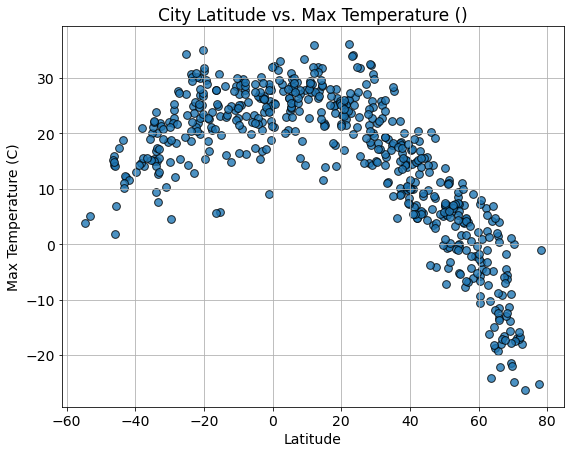

In [8]:
#Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Max Temperature (C)",size=14)
plt.title("City Latitude vs. Max Temperature ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude Vs. Humidity

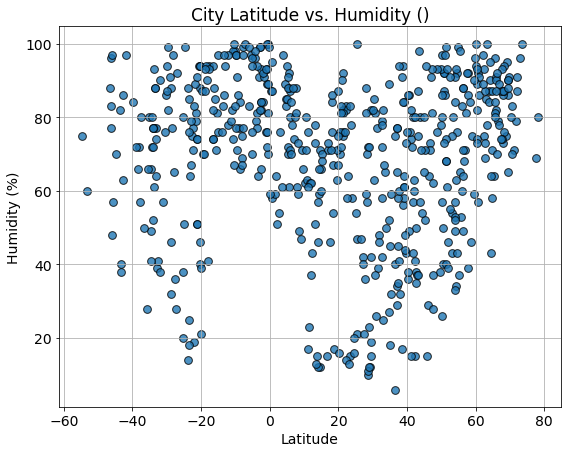

In [9]:
#Build scatter plot for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Humidity (%)",size=14)
plt.title("City Latitude vs. Humidity ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

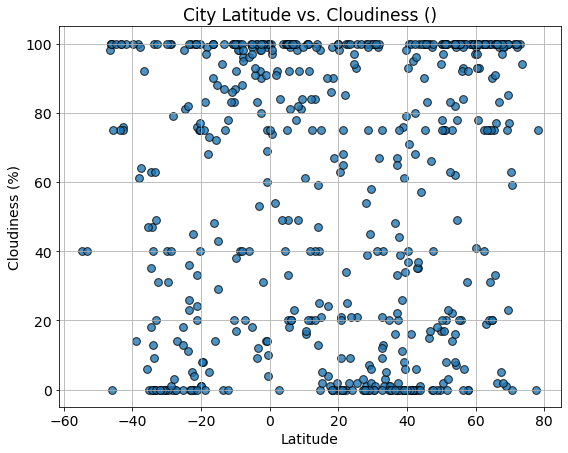

In [10]:
#Build scatter plot for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Cloudiness (%)",size=14)
plt.title("City Latitude vs. Cloudiness ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

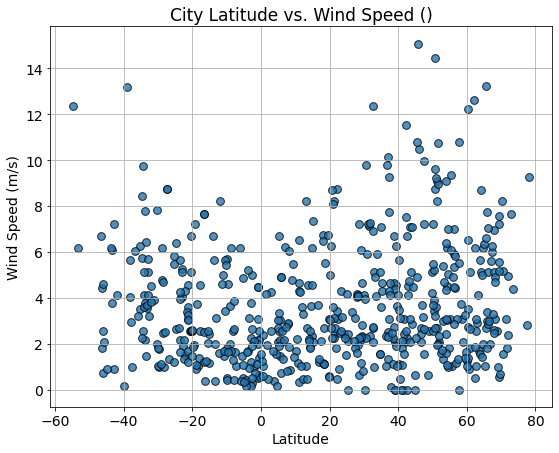

In [11]:
#Build scatter plot for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Wind Speed (m/s)",size=14)
plt.title("City Latitude vs. Wind Speed ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [49]:
#Define a function to create Linear Regression plots
def lr(a,b,c,d,e,f):
    
    #Build scatter plot for chosen a,b
    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60)

    #Incorporate the other graph properties
    plt.tick_params(axis='both',which='major',labelsize=14)
    plt.xlabel(c,size=14)
    plt.ylabel(d,size=14)
    
    #Regression
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(e,f),color="red",size=22)
    print(f"The r-value is {r}")
    
    #Show plot
    plt.show()

In [50]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,anloga,5.7947,0.8973,27.73,80,100,4.89,GH,1681099104
2,albany,42.6001,-73.9662,5.73,50,6,2.24,US,1681098766
3,lida,53.8833,25.2997,8.48,84,82,2.42,BY,1681099105
4,camacha,33.0833,-16.3333,15.68,82,40,5.14,PT,1681099105
5,longyearbyen,78.2186,15.6401,-1.09,80,75,9.26,SJ,1681099105


In [51]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

#Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.98,64,0,4.04,PF,1681099104
11,vao,-22.6667,167.4833,25.70,75,5,1.88,NC,1681099107
12,avarua,-21.2078,-159.7750,27.03,74,33,3.09,CK,1681099107
13,puerto ayora,-0.7393,-90.3518,25.86,89,69,0.52,EC,1681099107
14,dodoma,-6.1722,35.7395,19.95,83,40,6.17,TZ,1681099108


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8872428031321594


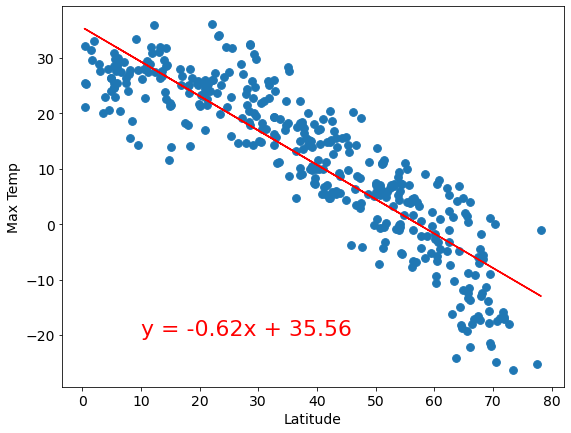

In [52]:
#Linear regression on Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = 10
f = -20
lr(a,b,c,d,e,f)

The r-value is 0.5538016821440009


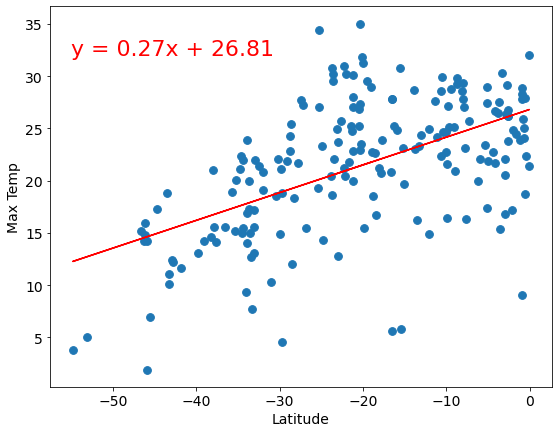

In [53]:
#Linear regression on Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = -55
f = 32
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.23798882984941813


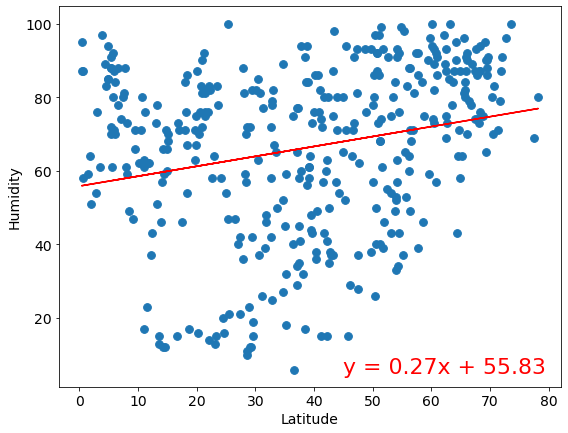

In [54]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = 45
f = 5
lr(a,b,c,d,e,f)

The r-value is 0.32882035195325293


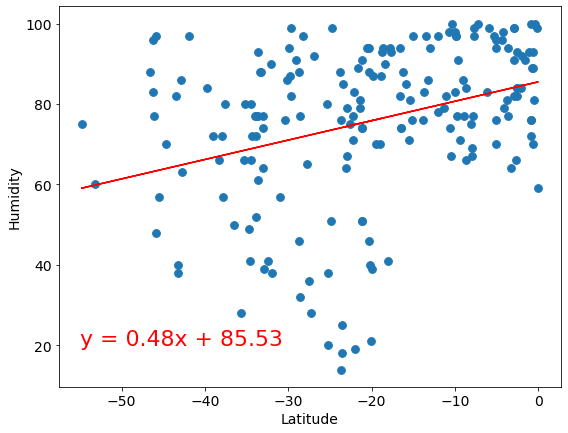

In [55]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = -55
f = 20
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.14429819749727002


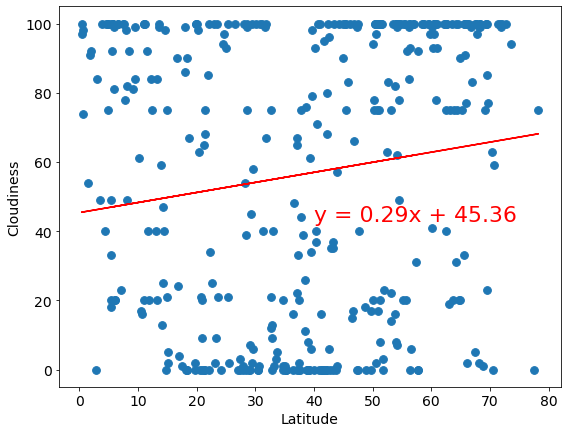

In [56]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = 40
f = 43
lr(a,b,c,d,e,f)

The r-value is 0.2139980365857158


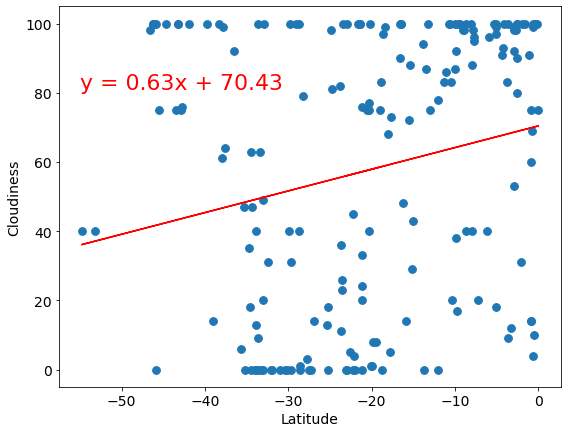

In [57]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = -55
f = 81
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.20529599119488257


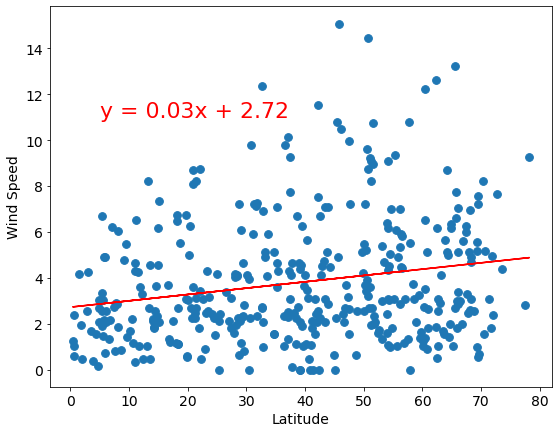

In [58]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = 5
f = 11
lr(a,b,c,d,e,f,)

The r-value is -0.3750512064808177


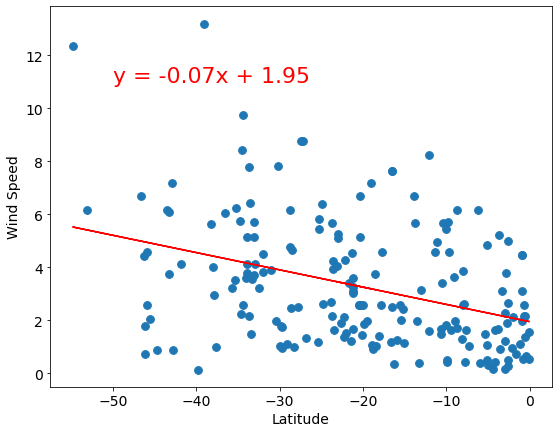

In [62]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = -50
f = 11
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE